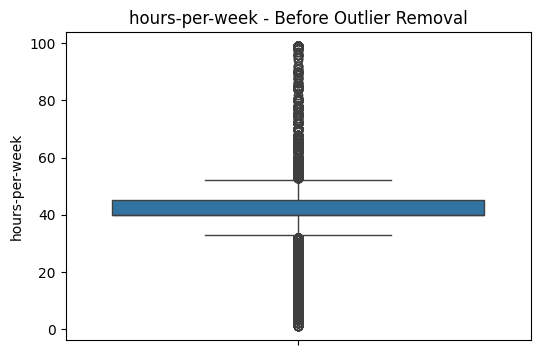

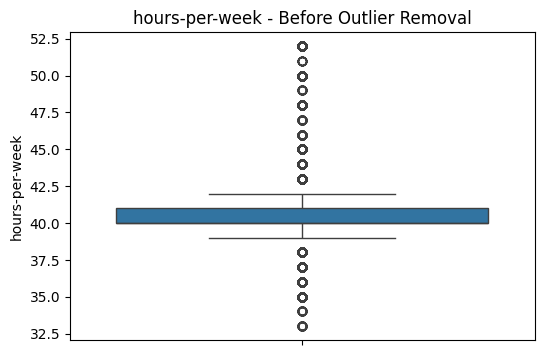

Logistic Regression Accuracy: 0.8226911976911977
Naive Bayes Accuracy: 0.79004329004329
Accuracy Difference (LogReg - NaiveBayes): 0.032647907647907703


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("adult_dataset.csv")

# ----- m. Data Cleaning -----
# Replace '?' with NaN and remove rows with any NaN values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Remove rows with negative numeric values
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df = df[(df[numeric_cols] >= 0).all(axis=1)]

# ----- n. Error Correcting (Outlier Removal) -----
# Boxplot before removing outliers for 'Hours_Per_Week'
plt.figure(figsize=(6, 4))
sns.boxplot(data=df['hours-per-week'])
plt.title("hours-per-week - Before Outlier Removal")
plt.show()

# Remove outliers using IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Boxplot after removing outliers for 'Hours_Per_Week'
plt.figure(figsize=(6, 4))
sns.boxplot(data=df['hours-per-week'])
plt.title("hours-per-week - Before Outlier Removal")
plt.show()

# ----- o. Data Transformation -----
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Normalize numeric features
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# ----- p. Build Data Model and Compare Accuracy -----
X = df.drop('income', axis=1)  # Use 'income' instead of 'Target'
y = df['income']  # Use 'income' as the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_model = LogisticRegression(max_iter=300)
log_model.fit(X_train, y_train)
log_acc = accuracy_score(y_test, log_model.predict(X_test))

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_acc = accuracy_score(y_test, nb_model.predict(X_test))

# Results
print("Logistic Regression Accuracy:", log_acc)
print("Naive Bayes Accuracy:", nb_acc)
print("Accuracy Difference (LogReg - NaiveBayes):", log_acc - nb_acc)